# 虚谷物联之数据绘图

## 1. 范例说明

数据是物联网的核心。无论将物联网技术用于哪个方面，数据分析永远是重要的一个环节。物联网数据分为复合数据和单一数据。复合数据指即彼此关联的数据，如环境数据中温度和湿度，这需要用一个消息主题（topicID）进行存储。我们普通使用的都是单一数据，即一个topicID中记录一组数据。

虽然SIoT的Web管理页面中本来就能呈现这种单一数据，用掌控板或者Mind+来绘制图表，都比较容易。该案例演示如何用Python代码实现动态绘图，借助matplotlib库，可以画出很多不同样式的图表。

1）数据类型：单一数据。

2）涉及资源：siot服务器，siot库、matplotlib库。
    
3）文档写作：谢作如

4）参考网站：https://github.com/vvlink/SIoT

5）其他说明：本作品范例可以移植到其他平台。因为虚谷号已经默认安装了siot库，也预装了siot服务器，使用虚谷号的用户可以省略这一步。

## 2. 代码编写

### 2.1 数据采集端

数据采集端指利用掌控板、Arduino或者虚谷号采集温湿度传感器的数据，发送到SIoT服务器。

TopicID名称为：xzr/100

传感器数据采集的方案很多，仅硬件就有很多种，代码略。具体请参考：https://github.com/vvlink/siot

### 2.2 数据呈现端

第一步：导入库

siot库是对mqtt库对二次封装，让代码更加简洁。

In [1]:
import siot

第二步：配置SIOT服务器

In [2]:
SERVER = "127.0.0.1"        #MQTT服务器IP
CLIENT_ID = ""              #在SIoT上，CLIENT_ID可以留空
IOT_pubTopic  = 'xzr/100'   #“topic”为“项目名称/设备名称”
IOT_UserName ='scope'        #用户名
IOT_PassWord ='scope'     #密码

说明：虚谷号可以用127.0.0.1表示本机，用户名和密码统一使用“scope”，topicid自己定义，这里用的是“xzr/100”，表示项目名称为“xzr”，设备名称为“100”。

第三步：连接SIOT服务器

In [3]:
siot.init(CLIENT_ID, SERVER, user=IOT_UserName, password=IOT_PassWord)
siot.connect()

第四步：设置绘图函数

因为在jupyter上运行，为了能够动态显示图表，特意加了“display.clear_output(wait=True)”，如果直接运行.py文件，请删除如下几句：

    %matplotlib inline
    from IPython import display
    display.clear_output(wait=True)

修改“plt.plot”中的参数'r--'，就可以得到不同颜色和类型的线条。其中第一个字母表示颜色，如“r”为红色，“b”为蓝色等。后面的字符表示线型。如：

    - 'r--'：红色的虚线
    - 'bs'：蓝色的方块
    - 'g^'：绿色的三角形
    - ……

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import display
x,p1=[],[]
i=0
w=20 #设置数据的长度
def draw(v1):
    global x,i,p1
    i=i+1
    x.append(i)
    p1.append(v1)
    # 当数据太多了开始删除，避免图表越来越小
    if len(x)>w:
        x.pop(0)
        p1.pop(0)
    fig = plt.figure()
    plt.plot(x,p1,'r--')
    display.clear_output(wait=True)
    plt.show()

第五步：订阅消息

“siot.subscribe(IOT_pubTopic, sub_cb)”中，“sub_cb”是回调函数名称。当“siot”对象收到一次消息，就会执行一次回调函数。在回调函数中调用绘图函数。

**需要注意的是，回调函数中如果存在代码错误，Python是不会输出的。这对代码调试带来了一定的难度。**

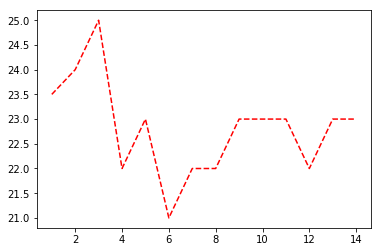

In [5]:
def sub_cb(client, userdata, msg):
    print("\nTopic:" + str(msg.topic) + " Message:" + str(msg.payload))
    # msg.payload是bytes类型，要转换
    s=float(msg.payload)
    draw(s)

siot.subscribe(IOT_pubTopic, sub_cb)
siot.loop()

接下来，我们就能够看到动态刷新的数据了。

**注：重新运行程序的时候，需先选择上方“服务”->再选择“重启 & 清空输出”。**